In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
hr=pd.read_csv("hr.csv",header=0,sep=',',encoding="latin")

In [8]:
hr.head()
hr["sales"].unique().tolist()

['sales',
 'accounting',
 'hr',
 'technical',
 'support',
 'management',
 'IT',
 'product_mng',
 'marketing',
 'RandD']

In [9]:
X=hr.drop(["left"],axis=1)
y=hr["left"]

In [10]:
X=pd.get_dummies(X)

In [11]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,base_estimator=DecisionTreeClassifier())

In [15]:
clf.fit(X_train,y_train)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [16]:
clf.oob_score_

0.9876656388032335

In [17]:
clf.score(X_test,y_test)

0.986

In [18]:
for w in range(10,300,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                     base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For Nestimators =' +str(w))
    print('oob score' +str(oob))
    print('################')

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For Nestimators =10
oob score0.9834152846070506
################
For Nestimators =30
oob score0.9887490624218684
################
For Nestimators =50
oob score0.9894157846487207
################
For Nestimators =70
oob score0.9896658054837904
################
For Nestimators =90
oob score0.9899991665972164
################
For Nestimators =110
oob score0.9899991665972164
################
For Nestimators =130
oob score0.9903325277106425
################
For Nestimators =150
oob score0.9904992082673556
################
For Nestimators =170
oob score0.9902491874322861
################
For Nestimators =190
oob score0.9901658471539295
################
For Nestimators =210
oob score0.9902491874322861
################
For Nestimators =230
oob score0.9902491874322861
################
For Nestimators =250
oob score0.9901658471539295
################
For Nestimators =270
oob score0.9903325277106425
################
For Nestimators =290
oob score0.9902491874322861
################


In [19]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400,base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

##Finalising a tree model with 150 trees

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=150, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [20]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_f

In [21]:
clf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1859118377, splitter='best')

In [22]:
clf.estimators_[0].feature_importances_

#these are the feature importances of our first tree for the bagged tree.

array([5.05185266e-01, 1.32251724e-01, 1.09587124e-01, 7.25383689e-02,
       1.56214185e-01, 9.76820763e-04, 3.25164961e-04, 9.23689326e-04,
       1.08236025e-03, 2.53569257e-03, 4.89440705e-04, 1.25078175e-03,
       8.91752891e-04, 8.14953601e-04, 2.43254883e-03, 2.96508657e-03,
       3.16484751e-03, 5.68842690e-04, 4.96944845e-03, 8.31900643e-04])

In [23]:
#we can extract feature importance for each tree then take a mean for all the trees

clf.estimators_[0].feature_importances_


array([5.05185266e-01, 1.32251724e-01, 1.09587124e-01, 7.25383689e-02,
       1.56214185e-01, 9.76820763e-04, 3.25164961e-04, 9.23689326e-04,
       1.08236025e-03, 2.53569257e-03, 4.89440705e-04, 1.25078175e-03,
       8.91752891e-04, 8.14953601e-04, 2.43254883e-03, 2.96508657e-03,
       3.16484751e-03, 5.68842690e-04, 4.96944845e-03, 8.31900643e-04])

In [24]:
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)
print(imp)

[4.94259930e-01 1.38175329e-01 1.10373065e-01 9.73728761e-02
 1.37465161e-01 1.56594688e-03 1.73808816e-04 1.56231577e-03
 6.41709903e-04 1.38994516e-03 5.89800609e-04 4.89768759e-04
 7.12127772e-04 6.66710044e-04 2.54159078e-03 2.83672315e-03
 3.13162998e-03 8.79625905e-04 3.08382250e-03 2.08811274e-03]


In [25]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [26]:
feature_importance.sort_values(ascending=False)

satisfaction_level       0.494260
last_evaluation          0.138175
time_spend_company       0.137465
number_project           0.110373
average_montly_hours     0.097373
sales_technical          0.003132
salary_low               0.003084
sales_support            0.002837
sales_sales              0.002542
salary_medium            0.002088
Work_accident            0.001566
sales_IT                 0.001562
sales_accounting         0.001390
salary_high              0.000880
sales_marketing          0.000712
sales_product_mng        0.000667
sales_RandD              0.000642
sales_hr                 0.000590
sales_management         0.000490
promotion_last_5years    0.000174
dtype: float64

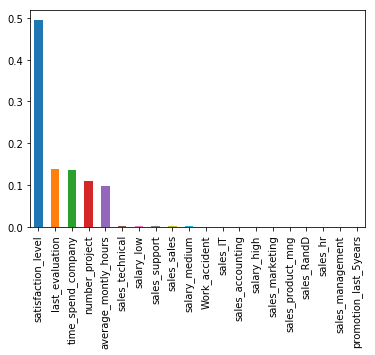

In [27]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

In [28]:
dat100=pd.read_csv("REG_TREE.csv",header=0,sep=',',encoding="latin")

In [29]:
dat100.columns

Index(['inquiries_12_months', 'age_oldest_account',
       'age_oldest_mortgage_account', 'age_newest_account',
       'number_of_accounts', 'number_accounts_opened_within_12_months',
       'number_accounts_always_satisfactory',
       'number_accounts_major_derogatory', 'number_accounts_past_due',
       'total_past_due_amount', 'bankruptcy_flag', 'foreclosure_flag',
       'total_amount_3rd_party_collections',
       'number_3rd_party_collection_accts', 'vantage_score_3',
       'product_category', 'pim_score', 'consumer_age', 'high_credit', 'terms',
       'monthly_payment', 'ecoa', 'hpi_11', 'UER_1210_PER', 'GDP_2011',
       'UER_SW_122010', 'Expected_Credit'],
      dtype='object')

In [30]:
X=dat100.drop(["Expected_Credit","ecoa","product_category","vantage_score_3"],axis=1)

In [31]:
y=dat100["vantage_score_3"]

In [32]:
X.head()

,inquiries_12_months,age_oldest_account,age_oldest_mortgage_account,age_newest_account,number_of_accounts,number_accounts_opened_within_12_months,number_accounts_always_satisfactory,number_accounts_major_derogatory,number_accounts_past_due,total_past_due_amount,...,number_3rd_party_collection_accts,pim_score,consumer_age,high_credit,terms,monthly_payment,hpi_11,UER_1210_PER,GDP_2011,UER_SW_122010
0,0,17,0,7,5,1,5,0,0,0,...,0,16,1,3500,0,70,357.74,7.5,61769,7.8
1,0,17,0,7,5,1,5,0,0,0,...,0,16,1,2000,0,40,357.74,7.5,61769,7.8
2,0,17,0,7,5,1,5,0,0,0,...,0,16,1,3250,85,50,357.74,7.5,61769,7.8
3,0,18,0,8,5,1,5,0,0,0,...,0,16,1,3500,0,70,357.74,7.5,61769,7.8
4,0,18,0,8,5,1,5,0,0,0,...,0,16,1,2000,0,40,357.74,7.5,61769,7.8


In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=400)

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,base_estimator=DecisionTreeClassifier())

In [36]:
clf.fit(X_train,y_train)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:609: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:614: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [ ]:
clf.oob_score_

0.890445960958578

In [ ]:
clf.score(X_test,y_test)

In [ ]:
for w in range(10,200,20):
    clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,
                     base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For Nestimators =' +str(w))
    print('oob score' +str(oob))
    print('################')
   

In [ ]:
clf=BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=90,random_state=400,base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

##Finalising a tree model with 90 trees

In [ ]:
clf.estimators_

In [ ]:
clf.estimators_[0].feature_importances_

#these are the feature importances of our first tree for the bagged tree.

In [23]:
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)


print(imp)

[1.12004814e-04 1.96989463e-04 6.16730769e-05 3.07244927e-04
 1.32090449e-04 7.82220514e-05 1.20901181e-04 7.03049994e-05
 1.23871461e-04 3.84591409e-04 9.36748972e-06 0.00000000e+00
 1.42118820e-04 5.23776103e-05 9.97436889e-01 1.13178230e-04
 3.83243508e-05 4.08798979e-05 1.96129258e-05 4.22817732e-05
 2.70394475e-04 3.17860314e-05 1.07384881e-04 1.07511181e-04]


In [24]:
feature_importance=pd.Series(imp,index=X.columns.tolist())


In [25]:
feature_importance.sort_values(ascending=False)

vantage_score_3                            0.997437
total_past_due_amount                      0.000385
age_newest_account                         0.000307
hpi_11                                     0.000270
age_oldest_account                         0.000197
total_amount_3rd_party_collections         0.000142
number_of_accounts                         0.000132
number_accounts_past_due                   0.000124
number_accounts_always_satisfactory        0.000121
pim_score                                  0.000113
inquiries_12_months                        0.000112
UER_SW_122010                              0.000108
GDP_2011                                   0.000107
number_accounts_opened_within_12_months    0.000078
number_accounts_major_derogatory           0.000070
age_oldest_mortgage_account                0.000062
number_3rd_party_collection_accts          0.000052
monthly_payment                            0.000042
high_credit                                0.000041
consumer_age

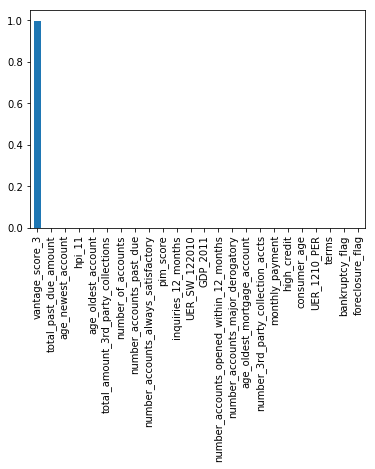

In [26]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

In [ ]:
######running Grid search to find out what is the good value for the no of estimators#######


In [ ]:
##### Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf=RandomForestClassifier(n_estimators=80,oob_score=True,n_jobs=-1,random_state=400)

In [27]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [28]:
clf.oob_score_

0.9905825485457121

In [29]:
for w in range(10,300,20):
    clf=RandomForestClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400)
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print('For Nestimators =' +str(w))
    print('oob score' +str(oob))
    print('################')
   

C:\Users\apinjala\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\apinjala\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


For Nestimators =10
oob score0.9832486040503375
################
For Nestimators =30
oob score0.9894991249270773
################
For Nestimators =50
oob score0.990082506875573
################
For Nestimators =70
oob score0.9905825485457121
################
For Nestimators =90
oob score0.9904992082673556
################
For Nestimators =110
oob score0.9908325693807817
################
For Nestimators =130
oob score0.9908325693807817
################
For Nestimators =150
oob score0.9905825485457121
################
For Nestimators =170
oob score0.9909992499374948
################
For Nestimators =190
oob score0.9909159096591382
################
For Nestimators =210
oob score0.9908325693807817
################
For Nestimators =230
oob score0.9908325693807817
################
For Nestimators =250
oob score0.9907492291024252
################
For Nestimators =270
oob score0.9906658888240687
################
For Nestimators =290
oob score0.9906658888240687
################


In [ ]:
#finalize the 190 trees

clf=RandomForestClassifier(n_estimators=50,oob_score=True,n_jobs=-1,random_state=400)

In [31]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
            oob_score=True, random_state=400, verbose=0, warm_start=False)

In [33]:
clf.oob_score_

0.9909159096591382

In [34]:
# for Random Forest we can directly extract the future importances
clf.feature_importances_

array([0.3138384 , 0.12430711, 0.18396834, 0.1514369 , 0.17650121,
       0.01018415, 0.00196677, 0.00182788, 0.0017952 , 0.00173233,
       0.00172401, 0.00170841, 0.00123802, 0.00118133, 0.00353554,
       0.00299638, 0.00370561, 0.00560635, 0.00722435, 0.00352169])

In [36]:
imp_feat=pd.Series(clf.feature_importances_,index=X.columns.tolist())

In [38]:
imp_feat.sort_values(ascending=False)

satisfaction_level       0.313838
number_project           0.183968
time_spend_company       0.176501
average_montly_hours     0.151437
last_evaluation          0.124307
Work_accident            0.010184
salary_low               0.007224
salary_high              0.005606
sales_technical          0.003706
sales_sales              0.003536
salary_medium            0.003522
sales_support            0.002996
promotion_last_5years    0.001967
sales_IT                 0.001828
sales_RandD              0.001795
sales_accounting         0.001732
sales_hr                 0.001724
sales_management         0.001708
sales_marketing          0.001238
sales_product_mng        0.001181
dtype: float64

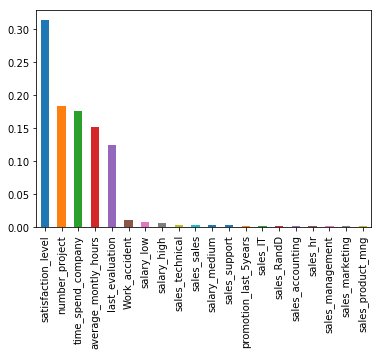

In [39]:
imp_feat.sort_values(ascending=False).plot(kind='bar')